## <center>Task 1</center>

1. Problem Statement<br>
Write a function to find moving average in an array over a window:<br>
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

Y = [  5.           4.66666667   5.66666667   6.66666667   9.66666667
  28.66666667  49.33333333  72.66666667  84.          93.33333333
 116.33333333]


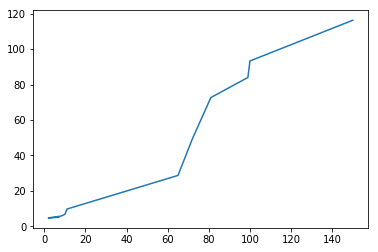

In [2]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

# x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
# y = [3,5,7,2,8,10,11,65,72,81,99,100,150]
x = [3,5,7,2,8,10,11,65,72,81,99,100,150]
 
yMA = movingaverage(x,3)
y = yMA
print("Y =",y)

plt.plot(x[len(x)-len(yMA):],yMA)
plt.show()

<h1> <center> Task 2 </center></h1>

1. How-to-count-distance-to-the-previous-zero<br>
For each value, count the difference back to the previous zero (or the start of the Series,whichever is closer)<br>
create a new column 'Y'<br>
Consider a DataFrame df where there is an integer column 'X'<br>
import pandas as pd<br>
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})<br>

In [3]:
import pandas as pd
import random
from random import randint

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
izero = np.r_[-1, (df['X'] == 0).nonzero()[0]]
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
print(df)

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


2. Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of
random numbers.

In [4]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')
s = pd.Series(np.random.rand(len(dti)), index=dti)
print(s)

2015-01-01    0.949329
2015-01-02    0.245920
2015-01-05    0.276002
2015-01-06    0.869932
2015-01-07    0.378587
2015-01-08    0.085522
2015-01-09    0.070948
2015-01-12    0.499015
2015-01-13    0.710320
2015-01-14    0.699546
2015-01-15    0.859215
2015-01-16    0.052102
2015-01-19    0.100152
2015-01-20    0.614118
2015-01-21    0.553854
2015-01-22    0.853776
2015-01-23    0.324527
2015-01-26    0.424570
2015-01-27    0.960324
2015-01-28    0.444628
2015-01-29    0.703670
2015-01-30    0.652044
2015-02-02    0.808189
2015-02-03    0.325445
2015-02-04    0.977949
2015-02-05    0.647538
2015-02-06    0.642222
2015-02-09    0.002356
2015-02-10    0.930616
2015-02-11    0.072484
                ...   
2015-11-20    0.986413
2015-11-23    0.441017
2015-11-24    0.650394
2015-11-25    0.136868
2015-11-26    0.218487
2015-11-27    0.989968
2015-11-30    0.370278
2015-12-01    0.178707
2015-12-02    0.614373
2015-12-03    0.644862
2015-12-04    0.828917
2015-12-07    0.037161
2015-12-08 

3. Find the sum of the values in s for every Wednesday

In [5]:
s[dti.weekday == 2].sum()

25.745391631067104

4. Average For each calendar month

In [6]:
s.resample('MS').mean()

2015-01-01    0.514914
2015-02-01    0.541995
2015-03-01    0.491379
2015-04-01    0.437370
2015-05-01    0.612590
2015-06-01    0.489578
2015-07-01    0.445729
2015-08-01    0.585648
2015-09-01    0.459684
2015-10-01    0.412481
2015-11-01    0.539113
2015-12-01    0.408075
Freq: MS, dtype: float64

5. For each group of four consecutive calendar months in s, find the date on which the highest value occurred

In [7]:
s.groupby(pd.Grouper(freq='4BM')).agg(['idxmax','max'])[:3]

,idxmax,max
2015-01-30,2015-01-27,0.960324
2015-05-29,2015-03-17,0.990811
2015-09-30,2015-07-03,0.993741
